

•	Model inputs:

*   condition: How good the condition is ( Overall )
*   grade: overall grade given to housing unit, based on King County grading system



*   sqft_abovesquare: footage of house apart from basement
*   yr_built: Built Year
*   sqft_basement: square footage of the basement
*   yr_renovated: Year when house was renovated
*   zipcode: zip
*   lat: Latitude coordinate
*   long: Longitude coordinate
*   sqft_living15: Living room area in 2015
*   sqft_lot15: lotSize area in 2015(implies-- some renovations)

The model should predict: 

*   House Price

### Step 1: Import Dataset

In [1]:
import tensorflow as tf
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
df = pd.read_csv('/content/drive/MyDrive/Testing_files/kc_house_data.csv')

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [5]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


In [6]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,3,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,3,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,3,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,5,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,3,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


### Step 2: Clean Data as Needed

### Step 3: Visualize Dataset

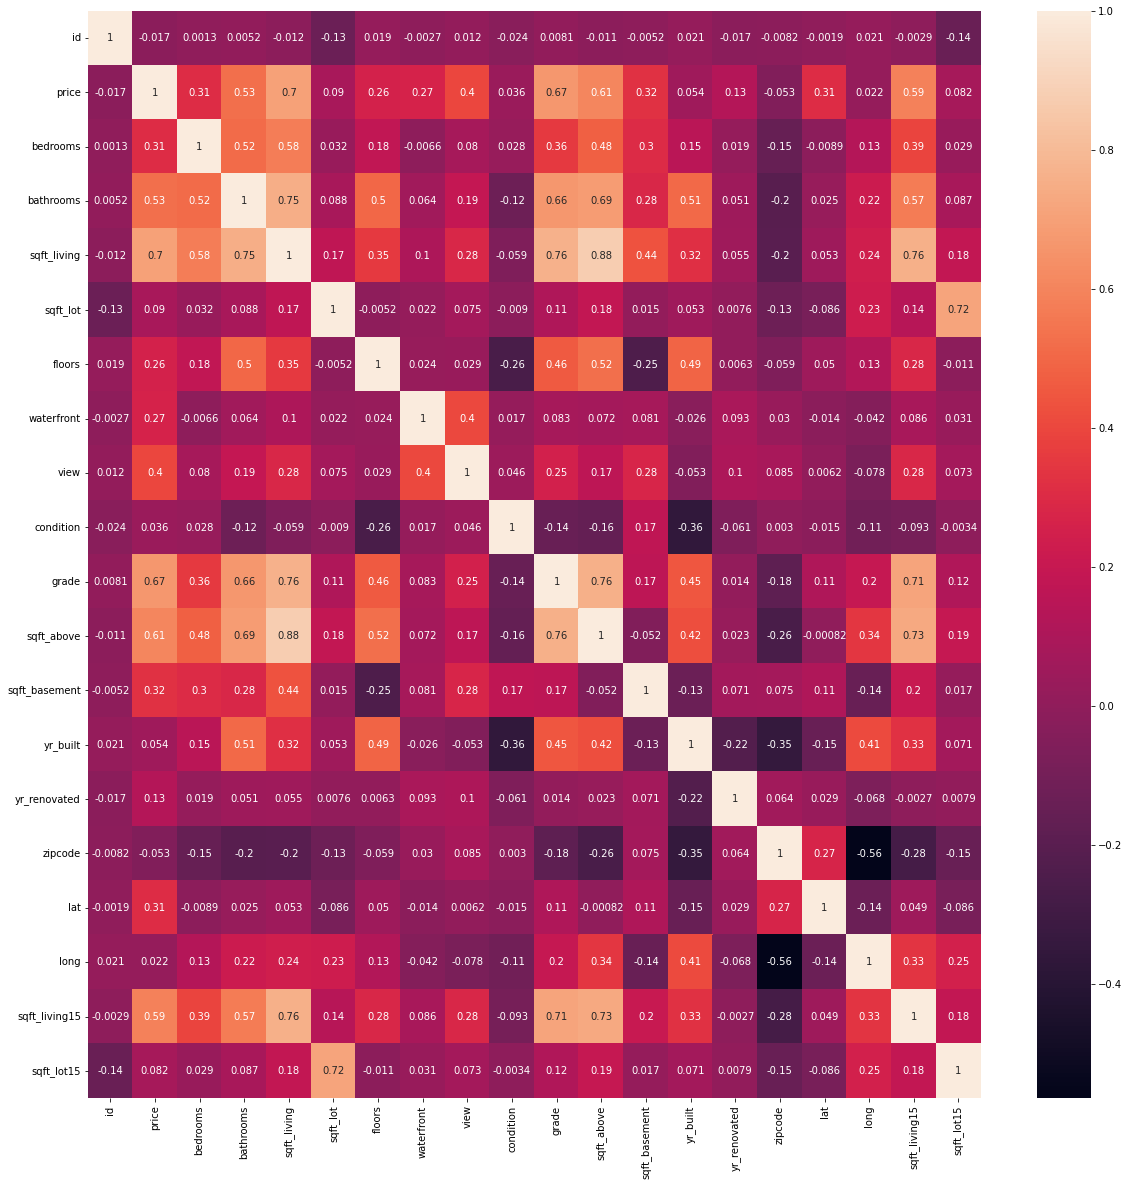

In [7]:
f, ax = plt.subplots(figsize = (20, 20))
sns.heatmap(df.corr(), annot = True)                #easy to see heatmap of which indenpendent variables are correlated with others

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f00212e0c90>,
      dtype=object)

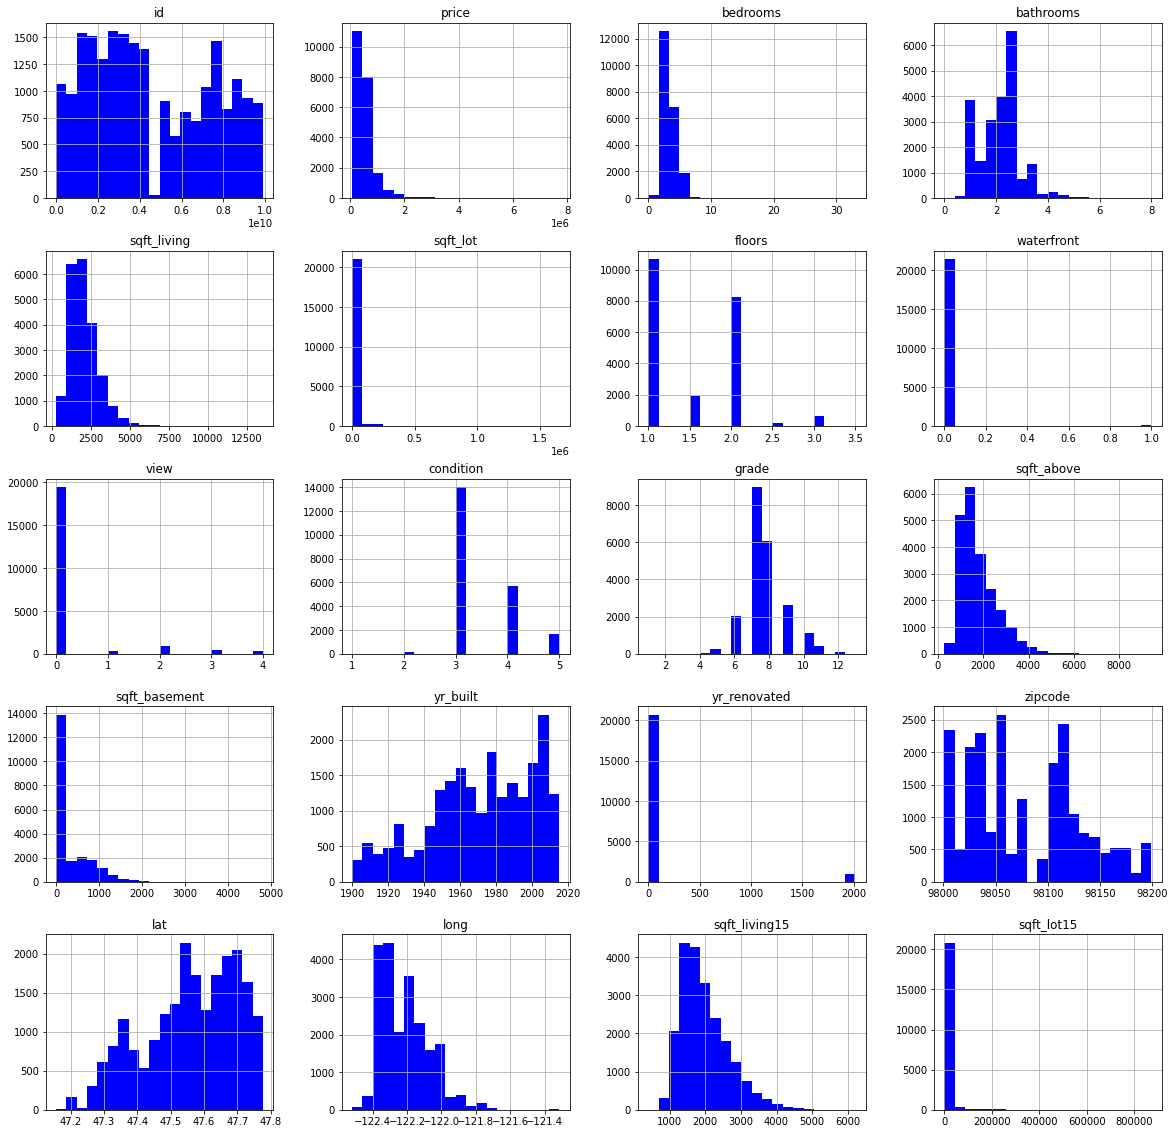

In [8]:
df.hist(bins = 20, figsize = (20, 20), color = 'b')

### Step 4: Create Training and Testing Dataset

In [9]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement']

In [10]:
X = df[selected_features]       #this is selecting the inputs for our model. 

In [11]:
X.head()

,bedrooms,bathrooms,sqft_living,sqft_lot,floors,sqft_above,sqft_basement
0,3,1.00,1180,5650,1.0,1180,0
1,3,2.25,2570,7242,2.0,2170,400
2,2,1.00,770,10000,1.0,770,0
3,4,3.00,1960,5000,1.0,1050,910
4,3,2.00,1680,8080,1.0,1680,0


In [12]:
y = df['price']

In [13]:
y

0        221900.0
1        538000.0
2        180000.0
3        604000.0
4        510000.0
           ...   
21608    360000.0
21609    400000.0
21610    402101.0
21611    400000.0
21612    325000.0
Name: price, Length: 21613, dtype: float64

In [14]:
X.shape

(21613, 7)

In [15]:
y.shape

(21613,)

In [16]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)                    #normalizing our inputs

In [17]:
X_scaled.shape

(21613, 7)

In [18]:
scaler.data_max_      #checking the max values

array([3.300000e+01, 8.000000e+00, 1.354000e+04, 1.651359e+06,
       3.500000e+00, 9.410000e+03, 4.820000e+03])

In [19]:
scaler.data_min_      #checking the min values

array([  0.,   0., 290., 520.,   1., 290.,   0.])

In [20]:
y = y.values.reshape(-1, 1)    #updating y to the shape we need

In [21]:
y_scaled = scaler.fit_transform(y)

In [22]:
y_scaled

array([[0.01926557],
       [0.06072131],
       [0.01377049],
       ...,
       [0.04289849],
       [0.04262295],
       [0.03278689]])

### Step 5: Train the Model

In [23]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [24]:
X_train.shape

(16209, 7)

In [25]:
X_test.shape

(5404, 7)

In [26]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (7,)))         #153 because we have 153 columns, input shape is only needed for the first layer
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear')) 

In [27]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 100)               800       
                                                                 
 dense_1 (Dense)             (None, 100)               10100     
                                                                 
 dense_2 (Dense)             (None, 100)               10100     
                                                                 
 dense_3 (Dense)             (None, 1)                 101       
                                                                 
Total params: 21,101
Trainable params: 21,101
Non-trainable params: 0
_________________________________________________________________


In [28]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [29]:
epochs_hist = model.fit(X_train, y_train, epochs = 10, batch_size = 50, validation_split = 0.2)

Epoch 1/10
260/260 [==============================] - 2s 3ms/step - loss: 0.0012 - val_loss: 0.0011
Epoch 2/10
260/260 [==============================] - 1s 3ms/step - loss: 0.0011 - val_loss: 0.0012
Epoch 3/10
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 4/10
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 5/10
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 9.9510e-04
Epoch 6/10
260/260 [==============================] - 1s 3ms/step - loss: 9.9983e-04 - val_loss: 0.0010
Epoch 7/10
260/260 [==============================] - 1s 2ms/step - loss: 9.7185e-04 - val_loss: 0.0010
Epoch 8/10
260/260 [==============================] - 1s 2ms/step - loss: 0.0010 - val_loss: 0.0011
Epoch 9/10
260/260 [==============================] - 1s 2ms/step - loss: 9.9939e-04 - val_loss: 9.9036e-04
Epoch 10/10
260/260 [==============================] - 1s 3ms/step - loss: 9.559

### Step 6: Evaluate the Model 

In [30]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

Text(0, 0.5, 'Loss')

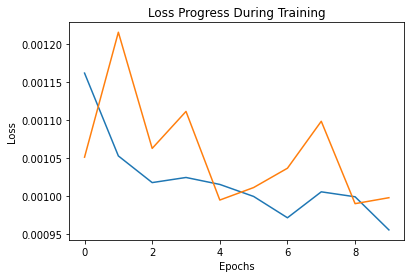

In [31]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')

Text(0, 0.5, 'True Values')

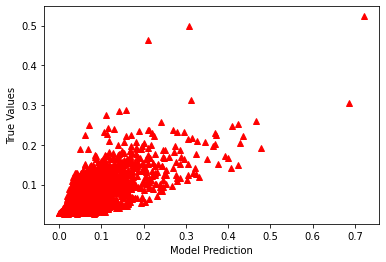

In [32]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'r')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')

In [33]:
#we want to see the true values instead of the normalized ones

y_predict_orig = scaler.inverse_transform(y_predict)

In [34]:
y_test_orig = scaler.inverse_transform(y_test)

Text(0, 0.5, 'True Values')

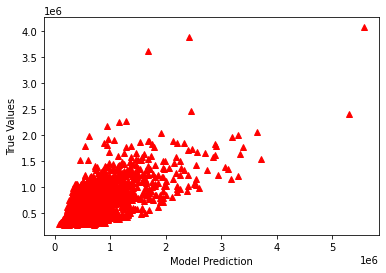

In [35]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')

In [36]:
#input a test example
X_test_1 = np.array([[4, 3, 1960, 5000, 1, 2000, 3000]])       #creatiing a test example

scaler_1 = MinMaxScaler()                                      #creating a normalization object
X_test_scaled_1 = scaler_1.fit_transform(X_test_1)             #normalizing the example

y_predict_1 = model.predict(X_test_scaled_1)                   #inputting our example into the model, this will return a price

y_predict_1 = scaler.inverse_transform(y_predict_1)            #normalizing the outputted price
y_predict_1                                                    #printing the outputed price

array([[279410.53]], dtype=float32)

In [37]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)


(0.0, 3000000.0)

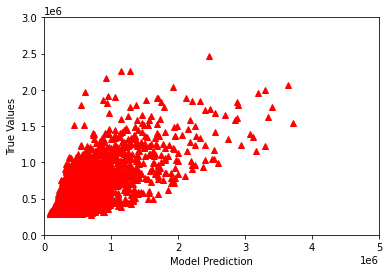

In [38]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [39]:
k = X_test.shape[1]

In [40]:
k   #this is so we know how many independent parameters we have

7

In [41]:
n = len(X_test)
n   

5404

In [42]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from math import sqrt

RMSE = float(format(np.sqrt(mean_squared_error(y_test_orig, y_predict_orig)), '0.3f'))

RMSE

242969.175

In [43]:
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1-r2) * (n-1) / (n - k - 1)

In [44]:
print('RMSE = ', RMSE, '\nMSE = ', MSE, '\nr2 = ', r2, '  #the higher this number the better\nadjusted r2 = ', adj_r2) 

RMSE =  242969.175 
MSE =  59034020137.76337 
r2 =  0.544022264814987   #the higher this number the better
adjusted r2 =  0.5434307444024046


### Updating the inputs to have more features from the data

In [47]:
selected_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'sqft_above', 'sqft_basement', 'waterfront', 'view', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15' ]

X = df[selected_features]

In [48]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(X)                    #normalizing our inputs

In [53]:
y_new = df['price']                                       #creating a variable for output / target labels

In [54]:
y_new.shape        #we need a comma 1 to be able to normalize the target labels

(21613,)

In [55]:
y_new = y_new.values.reshape(-1, 1)
y_scaled = scaler.fit_transform(y_new)

In [56]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size = 0.25)

In [57]:
X_test.shape

(5404, 14)

In [58]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu', input_shape = (14,)))         #153 because we have 153 columns, input shape is only needed for the first layer
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 100, activation = 'relu'))
model.add(tf.keras.layers.Dense(units = 1, activation = 'linear')) 

In [59]:
model.compile(optimizer = 'Adam', loss = 'mean_squared_error')

In [60]:
epochs_hist = model.fit(X_train, y_train, epochs = 10, batch_size = 50, validation_split = 0.2)

Epoch 1/10
260/260 [==============================] - 1s 3ms/step - loss: 0.0010 - val_loss: 5.9220e-04
Epoch 2/10
260/260 [==============================] - 1s 3ms/step - loss: 5.8160e-04 - val_loss: 4.4016e-04
Epoch 3/10
260/260 [==============================] - 1s 3ms/step - loss: 5.0922e-04 - val_loss: 4.0886e-04
Epoch 4/10
260/260 [==============================] - 1s 3ms/step - loss: 4.5743e-04 - val_loss: 5.0739e-04
Epoch 5/10
260/260 [==============================] - 1s 3ms/step - loss: 4.0271e-04 - val_loss: 5.4727e-04
Epoch 6/10
260/260 [==============================] - 1s 3ms/step - loss: 4.0480e-04 - val_loss: 4.8077e-04
Epoch 7/10
260/260 [==============================] - 1s 3ms/step - loss: 3.7506e-04 - val_loss: 4.4005e-04
Epoch 8/10
260/260 [==============================] - 1s 3ms/step - loss: 3.8127e-04 - val_loss: 5.4728e-04
Epoch 9/10
260/260 [==============================] - 1s 3ms/step - loss: 3.6233e-04 - val_loss: 3.2523e-04
Epoch 10/10
260/260 [===========

In [61]:
epochs_hist.history.keys()

dict_keys(['loss', 'val_loss'])

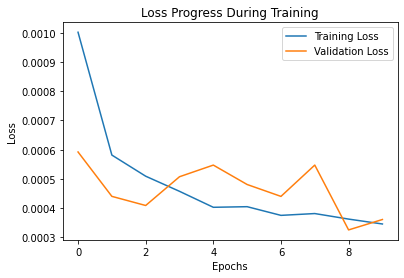

In [63]:
plt.plot(epochs_hist.history['loss'])
plt.plot(epochs_hist.history['val_loss'])
plt.title('Loss Progress During Training')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Training Loss', 'Validation Loss'])

Text(0, 0.5, 'True Values')

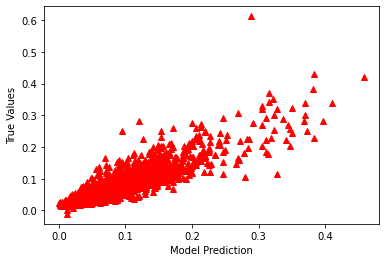

In [64]:
y_predict = model.predict(X_test)
plt.plot(y_test, y_predict, '^', color = 'r')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')

In [65]:
y_predict_orig = scaler.inverse_transform(y_predict)
y_test_orig = scaler.inverse_transform(y_test)

(0.0, 3000000.0)

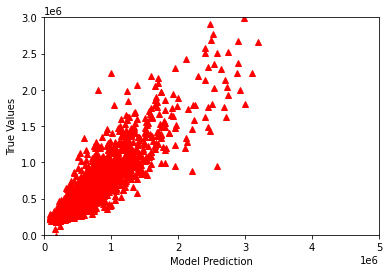

In [66]:
plt.plot(y_test_orig, y_predict_orig, '^', color = 'r')
plt.xlabel('Model Prediction')
plt.ylabel('True Values')
plt.xlim(0, 5000000)
plt.ylim(0, 3000000)

In [67]:
k = X_test.shape[1]

In [68]:
n = len(X_test)

In [69]:
MSE = mean_squared_error(y_test_orig, y_predict_orig)
MAE = mean_absolute_error(y_test_orig, y_predict_orig)
r2 = r2_score(y_test_orig, y_predict_orig)
adj_r2 = 1 - (1-r2) * (n-1) / (n - k - 1)

In [70]:
print('RMSE = ', RMSE, '\nMSE = ', MSE, '\nr2 = ', r2, '  #the higher this number the better\nadjusted r2 = ', adj_r2) 

RMSE =  242969.175 
MSE =  21479135242.286217 
r2 =  0.8162912072733377   #the higher this number the better
adjusted r2 =  0.815813953033558


In [72]:
# improve these numbers can be a continues process. Things to try:

#adding more columns of data
#trying a different shape of model. (more/less layers, more/less neurons, etc)
#trying different sizes of training/testing data